# Our World in Data CO2 Emissions Analysis

#### Data source

My data is from [Our World in Data](https://ourworldindata.org/). The file can be downloaded [here](https://github.com/owid/co2-data).

#### Importing the core data science libraries

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Importing the data

In [33]:
# Importing data from txt file to dataframe
df = pd.read_csv("data/owid-co2-data.txt", sep = "\t", encoding='utf8')

#### Data inspection

In [34]:
# Showing all columns
df.columns

Index(['iso_code', 'country', 'year', 'co2', 'consumption_co2',
       'co2_growth_prct', 'co2_growth_abs', 'trade_co2', 'co2_per_capita',
       'consumption_co2_per_capita', 'share_global_co2', 'cumulative_co2',
       'share_global_cumulative_co2', 'co2_per_gdp', 'consumption_co2_per_gdp',
       'co2_per_unit_energy', 'coal_co2', 'cement_co2', 'flaring_co2',
       'gas_co2', 'oil_co2', 'other_industry_co2', 'cement_co2_per_capita',
       'coal_co2_per_capita', 'flaring_co2_per_capita', 'gas_co2_per_capita',
       'oil_co2_per_capita', 'other_co2_per_capita', 'trade_co2_share',
       'share_global_cement_co2', 'share_global_coal_co2',
       'share_global_flaring_co2', 'share_global_gas_co2',
       'share_global_oil_co2', 'share_global_other_co2',
       'cumulative_cement_co2', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_oil_co2',
       'cumulative_other_co2', 'share_global_cumulative_cement_co2',
       'share_global_cumulative_c

Note that CO2 values are measured in million tonnes and CO2 per capita values are measured in tonnes per person.

In [35]:
df.head()

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,0.002,NaN,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,NaN,475.0,0.070,NaN,0.011,NaN,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,NaN,8.7,0.007,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,NaN,0.0,0.000,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,NaN,16.0,0.015,NaN,0.013,NaN,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN


Below, I show 5 randomly selected rows from the data set.

In [59]:
# Showing 5 randomly selected rows
df.sample(n=5)

,iso_code,country,year,co2,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,co2_per_capita,population,gdp
6122,DMA,Dominica,1995,0.081,NaN,NaN,NaN,NaN,0.081,NaN,1.134,71105.0,3.270781e+08
23557,ARE,United Arab Emirates,2002,83.698,0.359,2.599,0.905,69.525,10.310,NaN,24.060,3478769.0,1.878990e+11
25160,ZWE,Zimbabwe,1977,9.284,7.357,0.238,NaN,NaN,1.689,NaN,1.383,6712825.0,1.292554e+10
4848,COL,Colombia,1994,66.791,13.612,3.920,0.722,8.977,39.560,NaN,1.868,35758978.0,3.007550e+11
24502,VEN,Venezuela,1999,172.563,0.132,3.817,0.286,77.798,90.530,NaN,7.269,23739835.0,3.171970e+11


Below are the columns and their corresponding data types.

In [37]:
# Showing each column and the corresponding data type
df.dtypes

iso_code                                object
country                                 object
year                                     int64
co2                                    float64
consumption_co2                        float64
co2_growth_prct                        float64
co2_growth_abs                         float64
trade_co2                              float64
co2_per_capita                         float64
consumption_co2_per_capita             float64
share_global_co2                       float64
cumulative_co2                         float64
share_global_cumulative_co2            float64
co2_per_gdp                            float64
consumption_co2_per_gdp                float64
co2_per_unit_energy                    float64
coal_co2                               float64
cement_co2                             float64
flaring_co2                            float64
gas_co2                                float64
oil_co2                                float64
other_industr

#### Data munging


I first drop columns I won't need.

In [38]:
# Including only the columns I need
df = df[['iso_code', 'country', 'year', 'co2', 'coal_co2', 'cement_co2', 'flaring_co2', 'gas_co2', 'oil_co2', 'other_industry_co2', 'co2_per_capita', 'population', 'gdp']]

The dataset includes data for continents and regions, which do not have an ISO code. I will only be analyzing by country, so I can drop all rows with NaN values in the iso_code column.

In [39]:
# Dropping rows with NaN for ISO Code
df = df.dropna(subset=['iso_code'])

The World (World Total) rows have an ISO code, so I have to drop those separately.

In [40]:
# Dropping the World rows
df = df.drop(df[df['iso_code'] == "OWID_WRL"].index)

The data begins from years in the 1700s but many of these values are null, until around the 1900s. I choose to only include years starting from 1950.

In [41]:
# Filtering out years before 1950
df = df[df.year >= 1950]

In [42]:
df.to_csv('data/cleaned-owid-co2-data.txt', encoding='utf-8', sep='\t')

#### Data analysis

In the code below, I get the rows for year 1970, then sort the values by CO2 in descending order. I use the head function to get the top 10 CO2 emitting countries of that year. 

In [43]:
# Showing table for top 10 CO2 emitting countries for 1970 in descending order
df[df.year == 1970].sort_values(by='co2', ascending = False).head(10)

,iso_code,country,year,co2,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,co2_per_capita,population,gdp
24017,USA,United States,1970,4339.471,1168.091,34.709,26.249,1059.211,2038.082,13.13,20.712,209513340.0,4.912640e+12
18965,RUS,Russia,1970,1437.871,702.837,28.511,NaN,221.804,484.719,NaN,11.048,130148650.0,1.202690e+12
9540,DEU,Germany,1970,1026.022,603.234,22.889,NaN,29.766,370.134,NaN,13.057,78578381.0,1.343860e+12
4673,CHN,China,1970,807.953,665.866,10.718,NaN,5.503,94.645,31.22,0.976,827601385.0,1.144000e+12
11986,JPN,Japan,1970,767.963,229.264,28.267,0.040,7.676,502.715,NaN,7.319,104929260.0,1.615680e+12
23796,GBR,United Kingdom,1970,652.577,352.909,8.432,2.957,23.105,265.175,NaN,11.743,55573455.0,9.547560e+11
8707,FRA,France,1970,459.523,152.805,14.337,NaN,19.749,272.632,NaN,9.052,50763921.0,9.442330e+11
23463,UKR,Ukraine,1970,455.567,281.326,7.726,NaN,49.418,117.097,NaN,9.675,47088862.0,NaN
4230,CAN,Canada,1970,341.177,58.815,3.562,4.804,62.625,211.372,NaN,15.962,21374326.0,4.177520e+11
18216,POL,Poland,1970,304.143,261.488,6.018,NaN,10.915,25.722,NaN,9.318,32639262.0,2.295690e+11


In 1970, the USA was the strongest country economically, shown by GDP, and their CO2 emmisions were also the highest.

Now, lets look at the data for the most recent year, 2020, to see how this has changed.

In [44]:
# Showing table for top 10 CO2 emitting countries for 2020 in descending order
df[df.year == 2020].sort_values(by='co2', ascending = False).head(10)

,iso_code,country,year,co2,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,co2_per_capita,population,gdp
4723,CHN,China,2020,10667.887,7421.101,858.233,NaN,605.254,1611.762,171.539,7.412,1.439324e+09,NaN
24067,USA,United States,2020,4712.771,888.649,40.795,84.510,1654.988,2020.538,23.291,14.238,3.310026e+08,NaN
10977,IND,India,2020,2441.792,1587.552,122.908,1.678,126.984,602.670,NaN,1.769,1.380004e+09,NaN
19015,RUS,Russia,2020,1577.136,356.946,20.306,46.762,747.591,388.774,16.757,10.807,1.459345e+08,NaN
12036,JPN,Japan,2020,1030.775,402.979,25.376,0.393,216.544,377.382,8.102,8.150,1.264765e+08,NaN
11295,IRN,Iran,2020,745.035,5.114,23.877,60.225,434.227,221.592,NaN,8.870,8.399295e+07,NaN
9590,DEU,Germany,2020,644.310,199.077,13.287,2.017,170.733,250.681,8.515,7.690,8.378394e+07,NaN
19687,SAU,Saudi Arabia,2020,625.508,NaN,25.593,0.095,257.220,342.599,NaN,17.967,3.481387e+07,NaN
21008,KOR,South Korea,2020,597.605,282.883,22.871,NaN,114.831,166.717,10.303,11.656,5.126918e+07,NaN
11109,IDN,Indonesia,2020,589.500,300.518,33.804,11.091,78.478,165.610,NaN,2.155,2.735236e+08,NaN


As expected, China and USA are at the top, being the two economic powerhouses. I do find it shocking that China emits more than double of USA's emissions, and that the USA's emissions levels are roughly the same as in the 1970s. China's massive emissions presumably come from their massive manufacturing industry, which emits a lot of carbon byproduct. China and USA are followed by other economically powerful and/or resource rich countries. I think it is interesting to observe how the CO2 emissions are broken down by the particular sectors for each country. Another interesting point to note is the CO2 per capita level. China's per capita level is significantly lower than USA's (about half) due to their huge population, and India's CO2 per capita level is extremely low.

Lets take a deeper look into the top emitting country, China.

In the code below, I filter the country column to only include China. Then I use the & symbol to further filter the years for 1980 to present year, and I choose to look at the data in 5 year intervals.

In [45]:
# Showing China's CO2 emissions from 1970 to 2020 in intervals of 5 years
df[(df.country == 'China') & ((df.year >= 1970) & (df.year % 5 == 0))]

,iso_code,country,year,co2,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,co2_per_capita,population,gdp
4673,CHN,China,1970,807.953,665.866,10.718,NaN,5.503,94.645,31.220,0.976,8.276014e+08,1.144000e+12
4678,CHN,China,1975,1183.215,906.638,19.102,1.905,16.972,204.191,34.406,1.277,9.262409e+08,1.460730e+12
4683,CHN,China,1980,1494.496,1122.664,32.712,3.012,27.319,273.202,35.586,1.494,1.000089e+09,1.893780e+12
4688,CHN,China,1985,1998.083,1584.511,59.301,NaN,24.820,284.594,44.857,1.858,1.075589e+09,2.752670e+12
4693,CHN,China,1990,2484.855,1976.684,84.513,NaN,29.301,330.291,64.065,2.111,1.176884e+09,3.385120e+12
4698,CHN,China,1995,3357.909,2569.754,184.637,NaN,42.436,468.230,92.852,2.706,1.240921e+09,4.810000e+12
4703,CHN,China,2000,3439.152,2396.426,244.388,NaN,59.796,648.685,89.857,2.665,1.290551e+09,5.952680e+12
4708,CHN,China,2005,5876.555,4424.390,411.649,NaN,84.957,850.173,105.387,4.416,1.330776e+09,8.602940e+12
4713,CHN,China,2010,8616.653,6568.794,639.592,NaN,199.585,1092.572,116.110,6.295,1.368811e+09,1.285880e+13
4718,CHN,China,2015,9848.420,7266.979,721.995,NaN,366.649,1327.578,165.219,7.000,1.406848e+09,1.671090e+13


From 1970 to 2020, China's CO2 emissions have increased by more than 13x. Looking at the table, there is highest increase from the years 2000 to 2010 which is in line with their rapid economic development during these years.

Now lets take a look at the data for the USA, who were already a leading economic superpower.

In [46]:
# Showing USA's CO2 emissions from 1970 to 2020 in intervals of 5 years
df[(df.country == 'United States') & ((df.year >= 1970) & (df.year % 5 == 0))]

,iso_code,country,year,co2,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,co2_per_capita,population,gdp
24017,USA,United States,1970,4339.471,1168.091,34.709,26.249,1059.211,2038.082,13.130,20.712,209513340.0,4.912640e+12
24022,USA,United States,1975,4478.038,1168.057,30.276,7.112,992.428,2267.402,12.763,20.440,219081250.0,5.605800e+12
24027,USA,United States,1980,4808.296,1484.466,32.719,6.690,1017.996,2253.808,12.616,20.953,229476360.0,6.743210e+12
24032,USA,United States,1985,4652.383,1684.175,31.513,5.100,890.373,2030.806,10.416,19.345,240499822.0,7.874870e+12
24037,USA,United States,1990,5113.455,1841.986,33.484,41.757,1033.673,2138.355,24.199,20.282,252120309.0,9.250380e+12
24042,USA,United States,1995,5421.502,1942.302,37.075,39.410,1194.544,2180.865,27.305,20.446,265163740.0,1.051030e+13
24047,USA,United States,2000,6010.508,2179.839,41.445,36.182,1257.599,2469.140,26.303,21.336,281710914.0,1.297380e+13
24052,USA,United States,2005,6134.521,2214.838,46.194,37.244,1199.296,2608.477,28.473,20.795,294993509.0,1.470370e+13
24057,USA,United States,2010,5675.786,2013.304,31.449,41.343,1308.832,2250.504,30.354,18.368,309011469.0,1.527060e+13
24062,USA,United States,2015,5371.771,1504.946,39.907,61.546,1495.321,2239.490,30.560,16.741,320878312.0,1.690260e+13


The trend in USA's CO2 emissions looks quite different from that of China's. In the 1970's, USA was already the economic powerhouse of the world, and their emissions peaked at around 2005. Since then, it has slowly decreased every 5 years. 

Now, lets use the same code to look at the 10 countries with the highest CO2 per capita values.

In [47]:
# Showing table for top 10 CO2 per capita countries for 2020 in descending order
df[df.year == 2020].sort_values(by='co2_per_capita', ascending = False).head(10)

,iso_code,country,year,co2,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,co2_per_capita,population,gdp
18590,QAT,Qatar,2020,106.655,NaN,2.305,1.154,90.164,13.032,NaN,37.019,2881060.0,NaN
15761,NCL,New Caledonia,2020,8.693,5.77,0.033,NaN,NaN,2.889,NaN,30.448,285491.0,NaN
14881,MNG,Mongolia,2020,88.442,83.61,0.414,NaN,NaN,4.417,NaN,26.978,3278292.0,NaN
22737,TTO,Trinidad and Tobago,2020,35.509,NaN,0.252,NaN,31.136,4.122,NaN,25.373,1399491.0,NaN
3633,BRN,Brunei,2020,10.158,NaN,NaN,0.663,7.529,1.967,NaN,23.220,437483.0,NaN
12517,KWT,Kuwait,2020,88.935,NaN,1.572,1.729,41.448,44.186,NaN,20.825,4270563.0,NaN
2159,BHR,Bahrain,2020,34.960,NaN,0.524,NaN,30.830,3.606,NaN,20.546,1701583.0,NaN
5495,CUW,Curacao,2020,3.335,NaN,NaN,NaN,0.116,3.219,NaN,20.323,164100.0,NaN
19687,SAU,Saudi Arabia,2020,625.508,NaN,25.593,0.095,257.220,342.599,NaN,17.967,34813867.0,NaN
12298,KAZ,Kazakhstan,2020,291.336,171.63,3.800,14.622,48.146,50.159,2.978,15.516,18776707.0,NaN


As we can see, the countries in this table are entirely different than those in the previous table. Except for Saudi Arabia, there is no other overlapping country. Given that this table presents per capita values, we see countries with much smaller populations. I also think the countries in this table lean more towards being rich in natural resources than being economically powerful.

#### Data visualization

In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

First, lets create a line graph showing the CO2 emissions of China and USA over the years.

I do this by creating a new data frame for each country and filtering the existing data frame respectively. Then I create a list for unique year values.

I create two new lists to contain the values in the CO2 column, and I use values.tolist() to do this.

I then create a new data frame for the graph and plot it.

<AxesSubplot:xlabel='Year', ylabel='Carbon Emissions (MtCO2e)'>

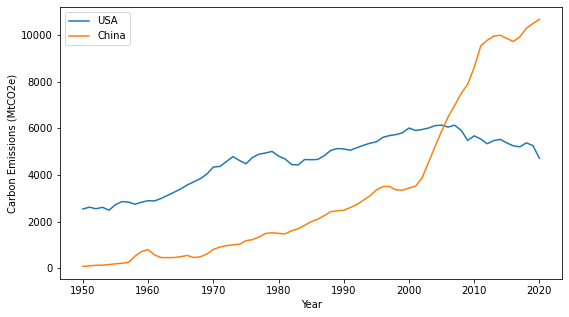

In [48]:
# Creating new data frame for each country
df_usa = df[(df.country == 'United States')]
df_china = df[(df.country == 'China')]

# Creating list containing unique year values pulled from the data frame
year = df.year.unique()

# Creating two new lists for each country and using pandas values.tolist() feature to add just the CO2 values
usa_co2 = df_usa['co2'].values.tolist()
china_co2 = df_china['co2'].values.tolist()

# Creating a new data frame for the line graph, containing CO2 lists for each country and the year
df_line = pd.DataFrame(
    { 'USA': usa_co2,
    'China': china_co2,
    'Year': year 
    }
)

# Graphing using df.plot
df_line.plot.line(x='Year', ylabel='Carbon Emissions (MtCO2e)', figsize = (9, 5))

From the graph above, we see that for the USA CO2 emissions increased gradually until around 2008, where it then began to decline. Meanwhile, China started with very low emissions in 1950. Emissions steadily increased until around 2000 where it began to increase at a much faster rate. China bypasses USA's CO2 emissions at around 2007/2008.

Next, lets take a look at how this compares to the GDP growth of these two countries.

I repeat the steps I took above, but for GDP values. I do not need to re-create the base data frames for the countries and year because I have already done so above.

<AxesSubplot:xlabel='Year', ylabel='GDP'>

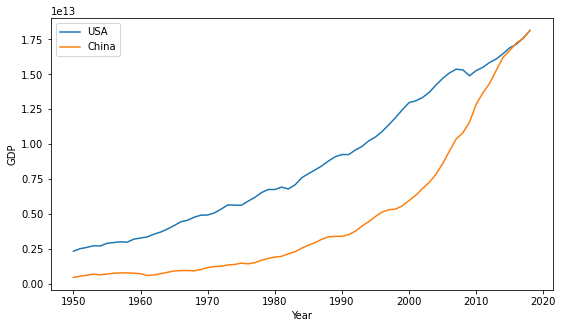

In [49]:
# Creating two new lists for each country and using pandas values.tolist() feature to add just the GDP values
usa_gdp = df_usa['gdp'].values.tolist()
china_gdp = df_china['gdp'].values.tolist()

# Creating a new data frame for the line graph, containing GDP lists for each country and the year
df_line = pd.DataFrame(
    { 'USA': usa_gdp,
    'China': china_gdp,
    'Year': year 
    }
)

# Graphing using df.plot
df_line.plot.line(x='Year', ylabel='GDP', figsize = (9, 5))

The graph shows China having a lower GDP, but it rapidly growing from the 2000s.

Now lets create a line graph that shows the change in CO2 emissions worldwide.

I do this by grouping the data frame by year, and summing the CO2 values.

<AxesSubplot:xlabel='Year', ylabel='Carbon Emissions (MtCO2e)'>

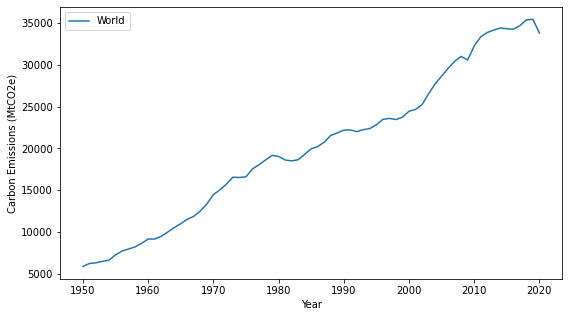

In [50]:
# Creating new data frame containing years and CO2 values
df_year_co2 = df[['year', 'co2']]

# Creating new data frame then finding the sum of CO2 for each year using .groupby() and .sum()
df_world_co2 = df_year_co2.groupby('year').sum()

# Creating new list for the CO2 data
world_co2 = df_world_co2['co2'].values.tolist()

# Creating a new data frame for the line graph, containing worldwide CO2 values and the year
df_world_line = pd.DataFrame(
    {'World': world_co2,
    'Year': year
    }
)

# Creating the graph using df.plot
df_world_line.plot.line(x='Year', y='World', ylabel='Carbon Emissions (MtCO2e)', figsize = (9, 5))

In terms of worldwide CO2 emissions, the graph shows a steady increase since 1950.

Now lets create a pie chart showing the top countries' CO2 shares globally.

First, I create a new data frame and grab the top nine CO2 emitting countries for 2020. I then add this data to a new list using .values.tolist().

Next, I want to get the value for CO2 emissions by the rest of the world, excluding these nine countries to accurately show their shares of global emissions. I do this by using a list I created right above for the worldwide CO2 emissions line graph. I create a new variable set it to the -1 index of the world_co2 list to get the most recent 2020 data.

However, the worldwide value includes the emissions from these nine countries. I loop through top9_2020 (the the list containing the CO2 emissions for the top nine countries) and subtract the values from the worldwide value.

I append the corrected value to the end of the top9_2020 list, create a new data frame with a corresponding index for the countries and plot the pie chart.

<AxesSubplot:ylabel='2020 Carbon Emissions (MtCO2e)'>

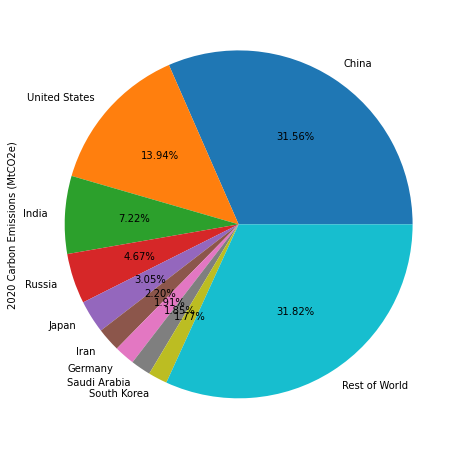

In [51]:
# Creating new data frame for the top 9 CO2 emitting countries
df_top9_2020 = df[df.year == 2020].sort_values(by='co2', ascending = False).head(9)

# Adding these values to a new list containing just CO2 values
top9_2020 = df_top9_2020['co2'].values.tolist()

top9_2020_countries = df_top9_2020['country'].values.tolist()

# Getting worldwide CO2 value for 2020, by indexing by -1 using the list for the previous line graph
rest_of_world_2020 = world_co2[-1]

# For looping to subtract the top nine's emissions from the worldwide value
for i in top9_2020:
    rest_of_world_2020 = rest_of_world_2020 - float(i)

# Appending the worldwide emissions value to the end of the list
top9_2020.append(rest_of_world_2020)

# Appending a string 'Rest of World' to the countries list
top9_2020_countries.append('Rest of World')

# Creating a new data frame with the CO2 values and an index containing the corresponding countries
df_2020_pie = pd.DataFrame(
    {'co2': top9_2020},
    index=top9_2020_countries
)

# Plotting the graph
df_2020_pie.plot.pie(y='co2', ylabel = '2020 Carbon Emissions (MtCO2e)', autopct = "%.2f%%", figsize = (8, 8), legend = False)


Although pie charts receive many criticims, I think they are useful in showing entities' shares of a total amount. In this case, it shows the top emitting countries' shares of total CO2 emissions in 2020. I think this chart does a good job of depicting how big of a part China plays in global emissions, taking 31.56% of the share.

To compare, lets also create a bar graph. For the bar graph, I do not want to include the 'Rest of the World' value, but just the top 10 CO2 emitting countries for 2020.

<AxesSubplot:xlabel='country', ylabel='2020 Carbon Emissions (MtCO2e)'>

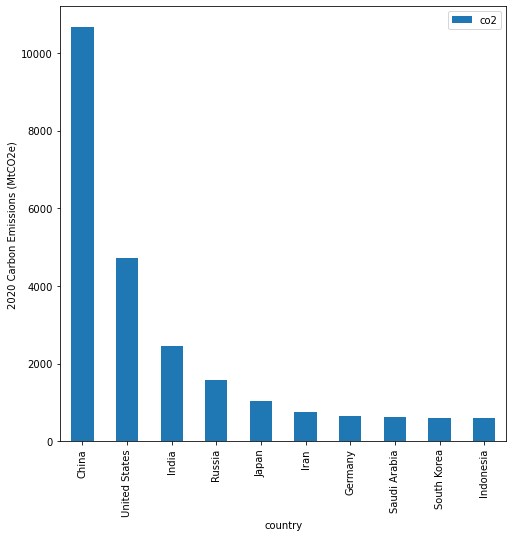

In [52]:
# Creating new data frame for the top 10 CO2 emitting countries
df_top10_2020 = df[df.year == 2020].sort_values(by='co2', ascending = False).head(10)

# New list containing just the CO2 values
top10_2020 = df_top10_2020['co2'].values.tolist()

# New list containing the country strings
top10_2020_countries = df_top10_2020['country'].values.tolist()

# Creating a new data frame with the CO2 values and an index containing the corresponding countries
df_2020_bar = pd.DataFrame(
    {'co2': top10_2020,
    'country': top10_2020_countries}
)

# Plotting the graph
df_2020_bar.plot.bar(x = 'country', y='co2', ylabel = '2020 Carbon Emissions (MtCO2e)', figsize = (8, 8))

The bar graph is useful for comparing the emissions to each other, but I think the pie chart is better at depicting the emissions share from the whole.

Thank you for reading my analysis.